In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [18]:
img = cv2.imread('im.png',0)
image = img
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)

In [19]:
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
ret,img = cv2.threshold(img,127,255,0)

In [20]:
skeleton_set = []
while True:
    eroded = cv2.erode(img, element)
    if np.sum(eroded) == 0:
        skeleton_set.append(img)
        break
    dilate = cv2.dilate(eroded, element)
    skeleton_set.append(img ^ (img & dilate))
    img = eroded
resultScel = skeleton_set[0]
for skeleton in skeleton_set[1:]:
    resultScel = resultScel | skeleton


In [21]:
resultRec = skeleton_set[-1]
for skeleton in skeleton_set[-2::-1]:
    resultRec = cv2.dilate(resultRec, element)
    resultRec = resultRec | skeleton

Text(0.5, 1.0, 'Again Original')

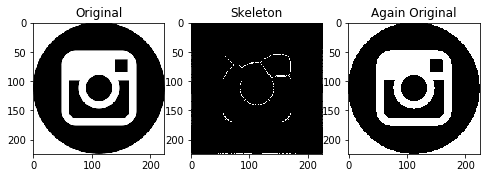

In [22]:
fig, axes = plt.subplots(ncols = 3, figsize=(8, 3))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(resultScel, cmap=plt.cm.gray)
ax[1].set_title('Skeleton')

ax[2].imshow(resultRec, cmap=plt.cm.gray)
ax[2].set_title('Again Original')